# Dogs classification

Authors: Michał Sułek, Andrzej Przybylski, Łukasz Kostrzewa, Patrycja Cieplicka
Date: 02.04.2021

In [1]:
import imagegenerator
import analyzer

import tensorflow as tf
from tensorflow.keras import layers
import models

In [2]:
data_path = 'images/subset'
results_path = 'results'
batch_size = 32

In [3]:
model = models.MobileNetV3((224,224),3)

In [4]:
model.build_mobileNetV3_2a()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
MobilenetV3small (Functional (None, 1024)              1529968   
_________________________________________________________________
reshape_9 (Reshape)          (None, 1, 1, 1024)        0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 1024)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 1, 3)           3075      
_________________________________________________________________
flatten (Flatten)            (None, 3)                 0         
_________________________________________________________________
activation (Activation)      (None, 3)                 0         
Total params: 1,533,043
Trainable params: 593,923
Non-trainable params: 939,120
__________________________________________

In [5]:
model.summary(detailed=True)

______________________________________________________
expanded_conv_3/project (Conv2D (None, 14, 14, 40)   3840        expanded_conv_3/squeeze_excite/Mu
__________________________________________________________________________________________________
expanded_conv_3/project/BatchNo (None, 14, 14, 40)   160         expanded_conv_3/project[0][0]    
__________________________________________________________________________________________________
expanded_conv_4/expand (Conv2D) (None, 14, 14, 240)  9600        expanded_conv_3/project/BatchNorm
__________________________________________________________________________________________________
expanded_conv_4/expand/BatchNor (None, 14, 14, 240)  960         expanded_conv_4/expand[0][0]     
__________________________________________________________________________________________________
tf.__operators__.add_5 (TFOpLam (None, 14, 14, 240)  0           expanded_conv_4/expand/BatchNorm[
______________________________________________________

In [6]:
image_generator = imagegenerator.ImageGenerator(data_path, validation_split=0.2, seed=123, batch_size=batch_size, image_size=(224,224))

In [7]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [8]:
history = model.train_with_generator(image_generator, 4, callbacks= [callback])

Found 465 images belonging to 3 classes.
Found 115 images belonging to 3 classes.
Epoch 1/4
15/15 [==============================] - 31s 2s/step - loss: 1.1877 - accuracy: 0.4094 - val_loss: 1.2207 - val_accuracy: 0.3478
Epoch 2/4
15/15 [==============================] - 20s 1s/step - loss: 1.2182 - accuracy: 0.3167 - val_loss: 1.1583 - val_accuracy: 0.3304
Epoch 3/4
15/15 [==============================] - 20s 1s/step - loss: 1.1304 - accuracy: 0.3542 - val_loss: 1.1257 - val_accuracy: 0.3304
Epoch 4/4
15/15 [==============================] - 20s 1s/step - loss: 1.1077 - accuracy: 0.3630 - val_loss: 1.1991 - val_accuracy: 0.3304


In [9]:
# history = model.train_with_arrays(image_generator, 3)

## Analyzer

Found 143 files belonging to 3 classes.
model_2c metrics:
accuracy: 0.329
2-accuracy: 0.650
confusion matrics:
 [[ 0 50  0]
 [ 0 47  0]
 [ 0 46  0]]


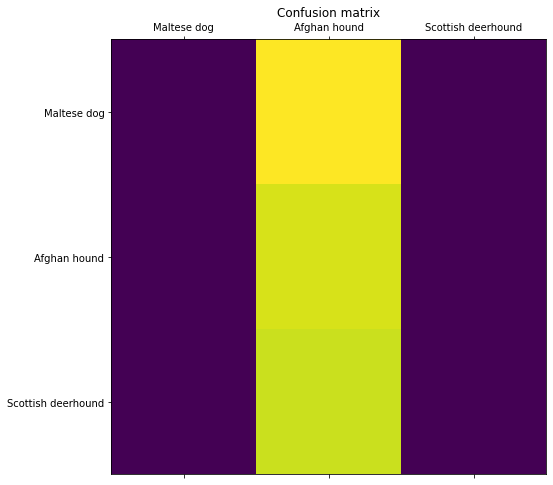

In [10]:
labels = ['Maltese dog', 'Afghan hound',  'Scottish deerhound']
an = analyzer.Analyzer(results_path)
an.analyze_model(model, 'model_2a', image_generator, model_parameters=None, labels=labels, k=2, print_metrics=True)